In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [2]:
# Data train | test 

X_train, Y_train = make_circles(n_samples=1000, noise=0.1, factor=0.2, random_state=0)
X_test, Y_test = make_circles(n_samples=1000, noise=0.1, factor=0.2, random_state=0)
X_train, X_test = X_train / X_train.max(), X_test / X_test.max()
Y_train, Y_test = Y_train.reshape(Y_train.shape[0], 1), Y_test.reshape(Y_test.shape[0], 1)
print("Training DataSet Input:", X_train.shape)
print("Training DataSet Output:", Y_train.shape)
print("Testing DataSet Input:", X_test.shape)
print("Testing DataSet Output:", Y_test.shape)


Training DataSet Input: (1000, 2)
Training DataSet Output: (1000, 1)
Testing DataSet Input: (1000, 2)
Testing DataSet Output: (1000, 1)


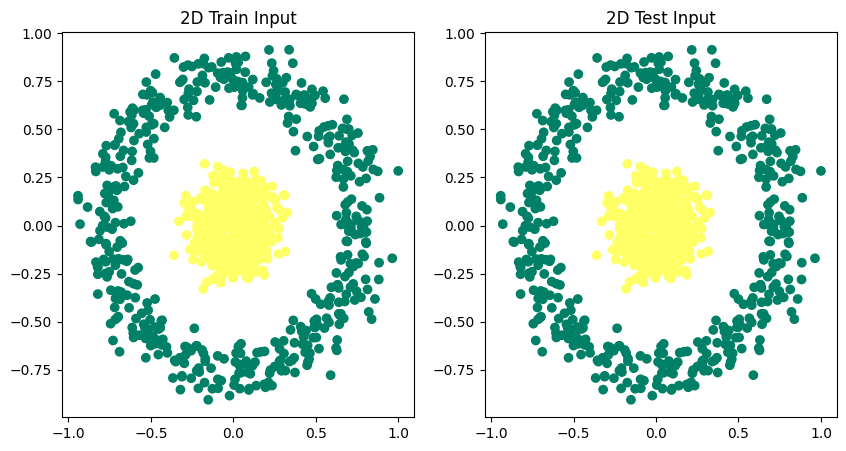

In [3]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title("2D Train Input")
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap='summer')
plt.subplot(1,2,2)
plt.title("2D Test Input")
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap='summer')
plt.show()


In [4]:
# Model

model = tf.keras.Sequential()
initW = tf.keras.initializers.RandomUniform(minval=0, maxval=1, seed=0)
model.add(tf.keras.layers.Dense(units=2, activation="relu", input_shape=[2], kernel_initializer=initW))
model.add(tf.keras.layers.Dense(units=5, activation="tanh", kernel_initializer=initW))
model.add(tf.keras.layers.Dense(units=5, activation="tanh", kernel_initializer=initW))
model.add(tf.keras.layers.Dense(units=1, activation="tanh", kernel_initializer=initW))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 5)                 15        
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Compile

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0),
    metrics=["accuracy"]
)

In [6]:
history = model.fit(X_train, Y_train,validation_data=(X_test, Y_test), batch_size=10, epochs=30)

Epoch 1/30
100/100 [==============================] - 1s 5ms/step - loss: 1.0969 - accuracy: 0.5610 - val_loss: 0.7512 - val_accuracy: 0.5360
Epoch 2/30
100/100 [==============================] - 0s 3ms/step - loss: 0.6978 - accuracy: 0.5720 - val_loss: 0.6723 - val_accuracy: 0.6720
Epoch 3/30
100/100 [==============================] - 0s 3ms/step - loss: 0.6620 - accuracy: 0.5760 - val_loss: 0.6500 - val_accuracy: 0.6630
Epoch 4/30
100/100 [==============================] - 0s 3ms/step - loss: 0.6420 - accuracy: 0.5800 - val_loss: 0.6375 - val_accuracy: 0.6870
Epoch 5/30
100/100 [==============================] - 0s 3ms/step - loss: 0.6272 - accuracy: 0.6100 - val_loss: 0.6180 - val_accuracy: 0.6860
Epoch 6/30
100/100 [==============================] - 0s 3ms/step - loss: 0.6131 - accuracy: 0.6540 - val_loss: 0.6062 - val_accuracy: 0.6680
Epoch 7/30
100/100 [==============================] - 0s 3ms/step - loss: 0.6051 - accuracy: 0.6620 - val_loss: 0.5979 - val_accuracy: 0.6890
Epoch 

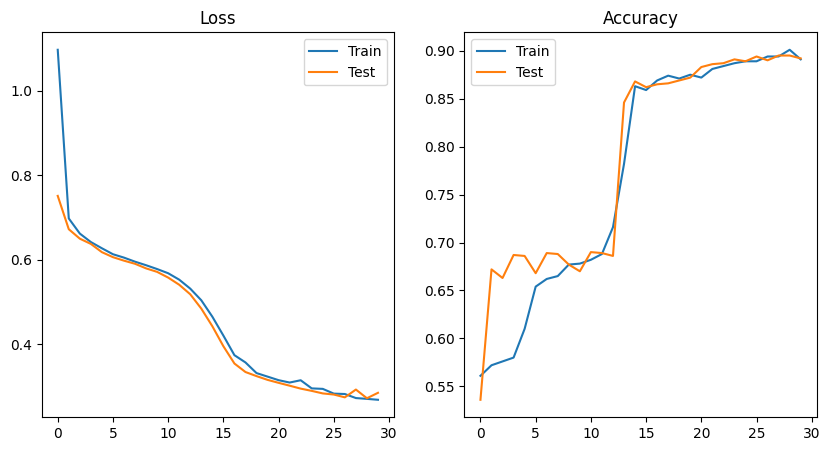

In [7]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title("Loss")
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.subplot(1,2,2)
plt.title("Accuracy")
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.legend()
plt.show()